In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [51]:
df = pd.read_csv('bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])['Y']#/df['Loan_Status'].size

332

In [53]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis=1)
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1, N=0))
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [49]:
smote = SMOTE(sampling_strategy='minority') # ratio 없어진 옵션
X1, y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [5]:
Counter(y)

Counter({0: 332, 1: 332})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [7]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs=50, verbose=0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

531/531 [==============================] - 0s 63us/step


[0.32124678972975235, 0.8813559412956238]

In [8]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.60)

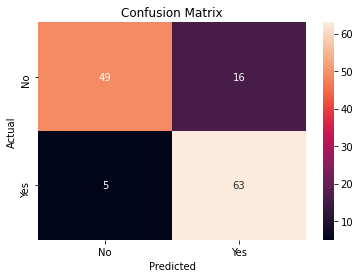

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);


ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [11]:
import pickle
import joblib # import 명령어 바뀜.
#filename = 'loan_model.pkl'
#joblib.dump(classifier, filename)

['loan_model.pkl']

In [13]:
mdl = joblib.load('loan_model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'test.xlsx'

In [83]:
df = pd.read_csv('bankloan.csv')

In [95]:
# # test.xlsx 파일
# df = pd.read_csv('bankloan.csv')
# df = df.dropna()
# df = df.drop('Loan_ID', axis=1)
# df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
# pre_y = df['Loan_Status']
# pre_X = df.drop('Loan_Status', axis=1)
# dm_X = pd.get_dummies(pre_X)
# dm_X = dm_X.loc[:22, :]
# dm_X.reset_index(inplace=True)
# dm_X.drop('index', axis=1, inplace=True)
# dm_X.to_excel('test.xlsx')

In [96]:
X=pd.read_excel('test.xlsx', index_col=0)
X

In [100]:
sc = MinMaxScaler()
X_test = sc.fit_transform(X)
y_pred = mdl.predict(X_test)
y_pred=(y_pred>0.58)

In [99]:
X_test

array([[0.33333333, 0.28452608, 0.13749088, 0.33433735, 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.14737481, 0.        , 0.14759036, 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        ],
       [0.        , 0.11124588, 0.21498906, 0.31024096, 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.        , 0.4072951 , 0.        , 0.37349398, 1.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.66666667, 0.35678392, 0.38256747, 0.753012

In [101]:
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [102]:
val = pd.DataFrame(y_pred, columns=['Status'])

In [104]:
val=val.replace({True:'Approved', False:'Rejected'})
val

,Status
0,Rejected
1,Approved
2,Rejected
3,Rejected
4,Rejected
5,Rejected
6,Rejected
7,Rejected
8,Rejected
9,Approved
